# MODELING 

In [1]:
# Import Libraries 

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier, ExtraTreesClassifier
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor, KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
import re
from sklearn import metrics
from keras.callbacks import EarlyStopping
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn import svm
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier, BaggingRegressor, RandomForestRegressor,  AdaBoostClassifier, AdaBoostRegressor
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import StratifiedKFold
from keras.callbacks import EarlyStopping
from sklearn import preprocessing



/Users/RajHoOT/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


Couldn't import dot_parser, loading of dot files will not be possible.


# INTRODUCTION

For my capstone project, I’ve decided to tackle the major issue that is the opioid crisis in America.  Right now, America faces an average of 115 opioid overdose deaths each day. Over 270 million prescriptions were written in 2012 alone and are a big contributing factor to this issue. As data scientists, we can’t really question whether doctors are pushing prescriptions from sponsorship from pharmaceutical companies, or if they are constantly barraged by patients claiming they are in severe pain and actually need the medication, or really, most other factors for that matter. So, what I wanted to do was try and find the likelihood that a provider would prescribe an opioid and identify any patterns, if any, from that data.

In [2]:
prescribers_clean = pd.read_csv('prescribers_clean.csv')

In [3]:
prescribers_clean.shape

(23937, 257)

In [4]:
prescribers_clean.head()

,Unnamed: 0,State,ABILIFY,ACETAMINOPHEN.CODEINE,ACYCLOVIR,ADVAIR.DISKUS,AGGRENOX,ALENDRONATE.SODIUM,ALLOPURINOL,ALPRAZOLAM,...,WARFARIN.SODIUM,XARELTO,ZETIA,ZIPRASIDONE.HCL,ZOLPIDEM.TARTRATE,Opioid.Prescriber,total_opioids,total_prescriptions,Abbrev,Deaths
0,0,TX,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,17,47,TX,2601.0
1,1,TX,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,144,TX,2601.0
2,2,TX,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,17,35,TX,2601.0
3,3,TX,0,0,16,0,0,0,0,22,...,40,54,0,0,12,1,155,890,TX,2601.0
4,4,TX,0,23,0,0,0,0,0,12,...,0,0,0,0,0,1,132,1332,TX,2601.0


In [5]:
np.random.seed(42)

In [6]:
prescribers_clean = pd.get_dummies(prescribers_clean, columns=['State', 'Abbrev'], drop_first=True)

### Setting up for Classification 

In [62]:
# Setting up for train test split

X = prescribers_clean.drop(['Opioid.Prescriber'], axis = 1).values.astype(float)
y = prescribers_clean['Opioid.Prescriber'].values

In [63]:
# TTS

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [9]:
# Logistic Regression 

# Set up pipeline 
ss = StandardScaler()
logreg = LogisticRegression()
pipes = Pipeline([('ss', ss), ('logreg', logreg)])

# Fit pipeline 
pipes.fit(X_train, y_train)
print(pipes.score(X_test, y_test))
print(pipes.score(X_train, y_train))

0.919103313840156
0.9209191286183229


In [10]:
# KNN 

knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
print(knn.score(X_test, y_test)) 
print(knn.score(X_train, y_train))

0.7489557226399332
0.8305580423754103


In [11]:
# Decision Tree 

decisiontree = DecisionTreeClassifier()
model = decisiontree.fit(X_train, y_train)
print(model.score(X_test, y_test))
print(model.score(X_train, y_train))

0.9007240323029797
1.0


In [12]:
# Bagged Decision

bagging = BaggingClassifier()
bagging.fit(X_train, y_train)
print(bagging.score(X_test, y_test))
print(bagging.score(X_train, y_train))

0.924812030075188
0.9915249179349448


In [13]:
# Random Forest

rf = RandomForestClassifier()
rf.fit(X_train, y_train)
print(rf.score(X_test, y_test))
print(rf.score(X_train, y_train))

0.9287106655527708
0.9913458669054014


In [14]:
# Adaboost

abr = AdaBoostClassifier()
abr.fit(X_train, y_train)
print(abr.score(X_test, y_test))
print(abr.score(X_train, y_train))

# This model is overfitting, I think 

0.929963798384851
0.9288570575947478


### EVALUATING MODELS 


In [15]:
# Define f1-score function
def f1(model, X, y):
    y_pred = model.predict(X)
    f1 = metrics.f1_score(y, y_pred) 
    return f1

In [16]:
# Logistic Regression Evaluation

f1(pipes, X_test, y_test), f1(pipes, X_train, y_train)

(0.9285099052540913, 0.9287749287749288)

In [17]:
# KNN Evaluation 

f1(knn, X_test, y_test), f1(knn, X_train, y_train)

(0.8029292818887309, 0.8631213538402199)

In [18]:
# Decision Tree Evaluation
f1(decisiontree, X_test, y_test), f1(decisiontree, X_train, y_train)

(0.9169868436372104, 1.0)

In [19]:
# Bagged Tree Evaluation 

f1(bagging, X_test, y_test), f1(bagging, X_train, y_train)

(0.9345454545454545, 0.9927283900040967)

In [20]:
# Random Forest Evaluation 

f1(rf, X_test, y_test), f1(rf, X_train, y_train)

(0.9379243452958292, 0.9925751446566644)

In [21]:
# ADA Evaluation

f1(abr, X_test, y_test), f1(abr, X_train, y_train)

(0.9385311010631797, 0.9363587827015485)

### Creating/Evaluating Model with Cross Validation 

In [22]:
np.random.seed(42)

In [23]:
# Encoding class values as integers 


encoder = LabelEncoder()
encoder.fit(y)
encoded_y = encoder.transform(y)

In [24]:
def create_baseline():
    # Build model 
    model = Sequential()
    model.add(Dense(60, input_dim = 352, kernel_initializer= 'normal', activation = 'relu'))
    model.add(Dense(1, kernel_initializer = 'normal', activation = 'sigmoid'))
    
    # Compile Model
    
    model.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])
    return model

In [25]:
# Evaluating model with the standardized dataset 

estimator = KerasClassifier(build_fn = create_baseline, nb_epoch = 100, batch_size = 5, verbose = 1)
kfold = StratifiedKFold(n_splits = 10, shuffle = True, random_state = 42)
results = cross_val_score(estimator, X, encoded_y, cv = kfold)
print("Results: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))


Epoch 1/1
2394/2394 [==============================] - 0s 204us/step
Epoch 1/1
2394/2394 [==============================] - 1s 213us/step
Epoch 1/1
2394/2394 [==============================] - 0s 192us/step
Epoch 1/1
2394/2394 [==============================] - 0s 200us/step
Epoch 1/1
2394/2394 [==============================] - 0s 209us/step
Epoch 1/1
2394/2394 [==============================] - 0s 197us/step
Epoch 1/1
2394/2394 [==============================] - 0s 203us/step
Epoch 1/1
2394/2394 [==============================] - 1s 214us/step
Epoch 1/1
2393/2393 [==============================] - 1s 230us/step
Epoch 1/1
2392/2392 [==============================] - 1s 217us/step
Results: 62.67% (15.74%)


In [26]:
# Evaluate baseline model with standardized dataset (This model takes a long time!!!) 

estimators = []
estimators.append(('standardize', StandardScaler()))
estimators.append(('mlp', KerasClassifier(build_fn=create_baseline, epochs = 20, batch_size = 5, verbose = 2)))
pipeline = Pipeline(estimators)
kfold = StratifiedKFold(n_splits = 10, shuffle = True, random_state = 42)
results = cross_val_score(pipeline, X, y, cv = kfold)
print("Standardized: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))

Epoch 1/20
 - 8s - loss: 0.4013 - acc: 0.8106
Epoch 2/20
 - 7s - loss: 0.2959 - acc: 0.8740
Epoch 3/20
 - 7s - loss: 0.2606 - acc: 0.8910
Epoch 4/20
 - 6s - loss: 0.2412 - acc: 0.9004
Epoch 5/20
 - 6s - loss: 0.2292 - acc: 0.9040
Epoch 6/20
 - 6s - loss: 0.2164 - acc: 0.9106
Epoch 7/20
 - 6s - loss: 0.2097 - acc: 0.9161
Epoch 8/20
 - 6s - loss: 0.2012 - acc: 0.9203
Epoch 9/20
 - 6s - loss: 0.1939 - acc: 0.9215
Epoch 10/20
 - 6s - loss: 0.1891 - acc: 0.9249
Epoch 11/20
 - 6s - loss: 0.1804 - acc: 0.9297
Epoch 12/20
 - 6s - loss: 0.1815 - acc: 0.9285
Epoch 13/20
 - 6s - loss: 0.1722 - acc: 0.9328
Epoch 14/20
 - 6s - loss: 0.1706 - acc: 0.9345
Epoch 15/20
 - 6s - loss: 0.1673 - acc: 0.9349
Epoch 16/20
 - 6s - loss: 0.1632 - acc: 0.9374
Epoch 17/20
 - 6s - loss: 0.1585 - acc: 0.9391
Epoch 18/20
 - 6s - loss: 0.1571 - acc: 0.9397
Epoch 19/20
 - 6s - loss: 0.1569 - acc: 0.9381
Epoch 20/20
 - 6s - loss: 0.1524 - acc: 0.9418
Epoch 1/20
 - 8s - loss: 0.4006 - acc: 0.8095
Epoch 2/20
 - 8s - loss

Epoch 17/20
 - 7s - loss: 0.1613 - acc: 0.9372
Epoch 18/20
 - 7s - loss: 0.1585 - acc: 0.9379
Epoch 19/20
 - 8s - loss: 0.1538 - acc: 0.9404
Epoch 20/20
 - 7s - loss: 0.1516 - acc: 0.9427
Epoch 1/20
 - 9s - loss: 0.3996 - acc: 0.8133
Epoch 2/20
 - 8s - loss: 0.2990 - acc: 0.8673
Epoch 3/20
 - 8s - loss: 0.2643 - acc: 0.8860
Epoch 4/20
 - 7s - loss: 0.2424 - acc: 0.9002
Epoch 5/20
 - 7s - loss: 0.2283 - acc: 0.9047
Epoch 6/20
 - 7s - loss: 0.2161 - acc: 0.9093
Epoch 7/20
 - 7s - loss: 0.2077 - acc: 0.9169
Epoch 8/20
 - 7s - loss: 0.2006 - acc: 0.9165
Epoch 9/20
 - 7s - loss: 0.1956 - acc: 0.9223
Epoch 10/20
 - 7s - loss: 0.1896 - acc: 0.9257
Epoch 11/20
 - 7s - loss: 0.1819 - acc: 0.9293
Epoch 12/20
 - 7s - loss: 0.1785 - acc: 0.9301
Epoch 13/20
 - 7s - loss: 0.1728 - acc: 0.9335
Epoch 14/20
 - 7s - loss: 0.1688 - acc: 0.9324
Epoch 15/20
 - 7s - loss: 0.1651 - acc: 0.9363
Epoch 16/20
 - 7s - loss: 0.1619 - acc: 0.9361
Epoch 17/20
 - 7s - loss: 0.1616 - acc: 0.9372
Epoch 18/20
 - 7s - lo

In [27]:
print("On cross validation model gives accuracy of: %.2f%% with a std of (%.2f%%)" % (results.mean()*100, results.std()*100))

On cross validation model gives accuracy of: 89.08% with a std of (1.63%)


## Final Model and Results 

In [64]:
model = Sequential()
model.add(Dense(60, input_dim = 352, kernel_initializer = 'normal', activation = 'relu'))
model.add(Dense(1, kernel_initializer = 'normal', activation = 'sigmoid'))

# Compiling Model 

earlystop = EarlyStopping(monitor = 'val_loss', min_delta = 0, patience = 2, verbose = 0, mode = 'auto')
callbacks_list = [earlystop]
model.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])


In [65]:
history = model.fit(X, y, validation_split = 0.1, epochs = 20, batch_size = 5, verbose = 2, callbacks = callbacks_list)

Train on 21543 samples, validate on 2394 samples
Epoch 1/20
 - 9s - loss: 6.3973 - acc: 0.5944 - val_loss: 6.0000 - val_acc: 0.6236
Epoch 2/20
 - 8s - loss: 6.6070 - acc: 0.5856 - val_loss: 6.0000 - val_acc: 0.6236
Epoch 3/20
 - 9s - loss: 6.6070 - acc: 0.5856 - val_loss: 6.0000 - val_acc: 0.6236


In [66]:
loss, accuracy = model.evaluate(X, y)

23937/23937 [==============================] - 1s 56us/step


In [67]:
accuracy

0.5893804570330451

In [68]:
loss

6.546255052336208

### Standardize Features and Applying to Model 

In [69]:

min_max_scaler = preprocessing.MinMaxScaler()
x_minmax = min_max_scaler.fit_transform(X)
X_test_minmax = min_max_scaler.transform(X_test)

scaler = StandardScaler()
scaler.fit(X)
X_scaled = scaler.transform(X)


In [70]:
history = model.fit(X_scaled, y, validation_split = 0.25, epochs = 20, batch_size = 5, verbose = 2, callbacks = callbacks_list)

Train on 17952 samples, validate on 5985 samples
Epoch 1/20
 - 7s - loss: 0.3825 - acc: 0.8278 - val_loss: 1.2417 - val_acc: 0.6207
Epoch 2/20
 - 7s - loss: 0.2839 - acc: 0.8810 - val_loss: 2.2568 - val_acc: 0.6015
Epoch 3/20
 - 7s - loss: 0.2467 - acc: 0.8976 - val_loss: 3.3950 - val_acc: 0.5791


In [71]:
loss, accuracy = model.evaluate(X_scaled, y)

23937/23937 [==============================] - 1s 39us/step


In [72]:
accuracy

0.8306387600785395

In [73]:
loss

1.0133577173513273

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])


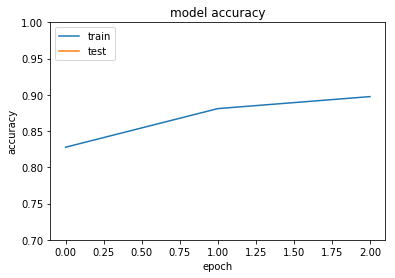

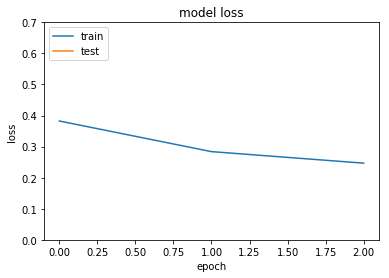

In [74]:
# list all data in history / code used directly from kaggle for this plot 
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.ylim(0.7,1)
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.ylim(0,0.7)
plt.legend(['train', 'test'], loc='upper left')
plt.show()